<a href="https://colab.research.google.com/github/saugabriele/IDSE_-lecture_1/blob/main/NearestMeanClassifier_MNISTClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', cache= True)

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:65: RuntimeWarning: Invalid cache, redownloading file
  warn("Invalid cache, redownloading file", RuntimeWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:100: UserWarning: A network error occurred while downloading https://openml.org/data/v1/download/52667. Retrying...
  warn(


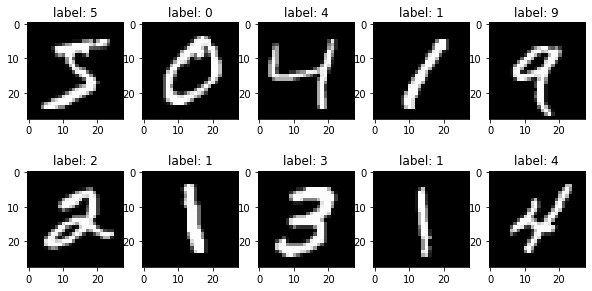

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array(mnist.data / 255)
y = np.array(mnist.target, dtype = int)

plt.figure(figsize=(10,5))

for i in range(10):
  plt.subplot(2,5,i+1)
  img = x[i, :].reshape(28,28)
  plt.imshow(img, cmap='gray')
  plt.title("label: " + str(y[i]))

In [3]:
def samples_per_class(y):
  n_classes = np.unique(y).size
  class_labels = np.unique(y)

  #count how many element i have for each class
  n_samples_per_class = np.zeros(shape=(n_classes,))

  for k in range(n_classes):
    n_samples_per_class[k] = np.sum(y==k)
  
  return n_samples_per_class, class_labels

<BarContainer object of 10 artists>

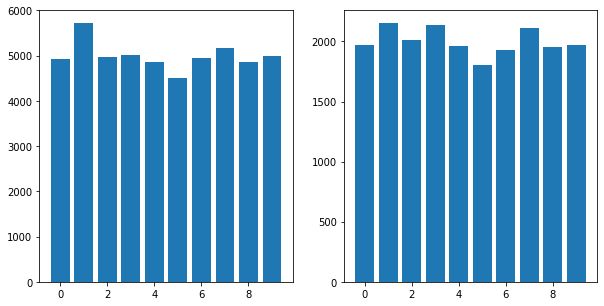

In [4]:
#data splits: the goal is to split X,y into two disjoints sets
n_tr = 50000
n_ts = 20000

#before select a 1000 samples as training set and 1000 for the test set
#we shuffle the entire data set and then we can choose the samples

def split_data(x, y, n_tr, n_ts):

  n_samples = x.shape[0]
  idx = np.linspace(0, n_samples-1, num=n_samples, dtype=int)
  np.random.shuffle(idx)   #Inplace operation
  idx_tr = idx[:n_tr]
  idx_ts = idx[n_tr:n_tr+n_ts]

  x_tr = x[idx_tr, :]
  y_tr = y[idx_tr]

  x_ts = x[idx_ts, :]
  y_ts = y[idx_ts]
  return x_tr, y_tr, x_ts, y_ts

x_tr, y_tr, x_ts, y_ts = split_data(x, y, n_tr, n_ts)

n_tr_samples_per_class, class_labels_tr = samples_per_class(y_tr)
n_ts_samples_per_class, class_labels_ts = samples_per_class(y_ts)

plt.figure(figsize =(10, 5))
plt.subplot(1,2,1)
plt.bar(class_labels_tr, n_tr_samples_per_class)
plt.subplot(1,2,2)
plt.bar(class_labels_ts, n_ts_samples_per_class)

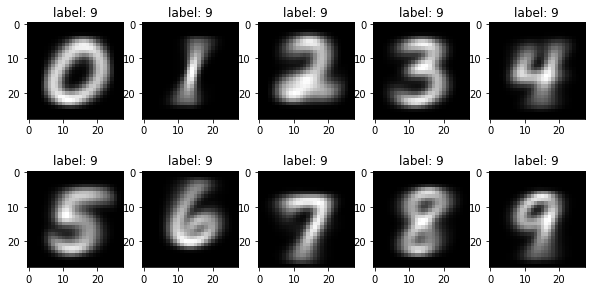

In [26]:
#we want to compute the average(centroid) image for each class (from the training set)

def fit(x_tr, y_tr):
  n_classes = np.unique(y).size
  n_features = x.shape[1]

  centroids = np.zeros(shape =(n_classes, n_features))

  for k in range(n_classes):
    #extract only image of 0 from x_tr
    xk = x_tr[y_tr==k, :]
    centroids[k, :] = np.mean(xk, axis = 0)#We can median beacause it is more robust
  return centroids, n_classes

centroids, n_classes = fit(x_tr, y_tr)

#visualize the centroids
plt.figure(figsize=(10,5))
for i in range(n_classes):
  plt.subplot(2,5,i+1)
  plt.imshow(centroids[i,:].reshape(28,28), cmap='gray')
  plt.title("label: " + str(k))

In [35]:
#Implentation of the predict
#1. compute distances of test points against the centroids (distance matrix)
#2. need to assign one predicted label to each test sample

n_ts_samples = x_ts.shape[0]
n_classes = centroids.shape[0]

dist = np.zeros(shape=(n_ts_samples, n_classes))

#here we can use broadcasting for speed up the proce ss of computing the distances
for k in range(n_classes):
  dist[:, k] = np.sqrt(np.sum((x_ts - centroids[k,:])**2, axis=1))

#another possible solution using a  librery is
from sklearn.metrics import pairwise_distances

dist2 = pairwise_distances(x_ts, centroids)

#now we need to make the preditions

def predict(x_ts, centroids):
  dist = pairwise_distances(x_ts, centroids)
  y_pred = np.argmin(dist, axis=1)
  return y_pred

y_pred = predict(x_ts, centroids)

print("Percentage of error: ", np.mean(y_pred != y_ts))

Percentage of error:  0.18565
